### Test the effect of six clinical indicators on POI prediction problems using machine learning

In [1]:
import os
import pandas as pd
import numpy as np

#### 1 data preprocessing

In [2]:
# load datasets
case_cohort = pd.read_csv('../datasets/6-feature/POI-case_participant.csv')
control_cohort = pd.read_csv('../datasets/6-feature/POI-control_participant.csv')

In [3]:
case_cohort

,eid,sleep duration,sleeplessness,BMI,smoking status,T2D,coffee intake
0,1004331,9,Usually,18.2098,Previous,NaN,1
1,1005087,7,Never/rarely,31.2883,Previous,NaN,4
2,1007659,5,Usually,31.8405,Previous,-0.395678,0
3,1014838,7,Sometimes,24.3080,Never,NaN,1
4,1019851,9,Never/rarely,25.1797,Never,0.442098,5
...,...,...,...,...,...,...,...
10620,6007774,9,Sometimes,33.7012,Never,-0.178532,5
10621,6009046,8,Sometimes,24.6152,Previous,NaN,Less than one
10622,6009842,9,Usually,27.7651,Never,-0.643006,3
10623,6010824,8,Sometimes,24.7789,Never,NaN,0


In [4]:
case_cohort.isna().sum()

eid                  0
sleep duration       0
sleeplessness        0
BMI                 73
smoking status       0
T2D               8470
coffee intake        0
dtype: int64

In [5]:
control_cohort

,eid,sleep duration,sleeplessness,BMI,smoking status,T2D,coffee intake
0,1000215,6,Never/rarely,24.6355,Current,-0.537662,2
1,1000544,7,Never/rarely,21.8195,Never,NaN,0
2,1000821,5,Usually,26.0156,Current,NaN,2
3,1001040,7,Usually,21.9854,Never,NaN,0
4,1001071,7,Sometimes,22.8538,Current,NaN,2
...,...,...,...,...,...,...,...
50582,6022151,8,Sometimes,27.7651,Never,-1.360960,0
50583,6022571,6,Sometimes,25.9651,Previous,NaN,0
50584,6023181,6,Usually,23.8150,Previous,-1.624070,4
50585,6023229,Do not know,Usually,27.7441,Current,NaN,1


In [6]:
control_cohort.isna().sum()

eid                   0
sleep duration        2
sleeplessness         2
BMI                 245
smoking status        2
T2D               40208
coffee intake         2
dtype: int64

In [7]:
# Use the mean value of the column 'BMI' to fill in the missing BMI values
mean_val = case_cohort['BMI'].mean()
case_cohort['BMI'].fillna(mean_val, inplace=True)
mean_val = control_cohort['BMI'].mean()
control_cohort['BMI'].fillna(mean_val, inplace=True)

In [8]:
# Use 'Prefer not to answer' to fill the missing sleep duration, sleeplessness and smoking status values
control_cohort['sleep duration'].fillna('Prefer not to answer', inplace=True)
control_cohort['sleeplessness'].fillna('Prefer not to answer', inplace=True)
control_cohort['smoking status'].fillna('Prefer not to answer', inplace=True)

In [9]:
# Use 0s to fill the missing T2D values
case_cohort['T2D'].fillna(0, inplace=True)
control_cohort['T2D'].fillna(0, inplace=True)

In [10]:
# Use 'Do not know' to fill the missing coffee intake values
control_cohort['coffee intake'].fillna('Do not know', inplace=True)
control_cohort['coffee intake'].fillna('Do not know', inplace=True)

In [11]:
# check unique values of sleep duration
case_cohort['sleep duration'].value_counts()

7                       3367
8                       2937
6                       2236
5                        708
9                        695
10                       226
4                        219
Do not know               89
12                        52
3                         42
11                        27
2                         12
Prefer not to answer       6
16                         4
14                         3
15                         1
1                          1
Name: sleep duration, dtype: int64

In [12]:
control_cohort['sleep duration'].value_counts()

7                       18479
8                       14873
6                        9689
9                        3264
5                        2382
10                        752
4                         486
Do not know               308
12                        107
3                          96
11                         78
Prefer not to answer       31
2                          13
14                         10
13                          9
15                          5
1                           3
18                          1
17                          1
Name: sleep duration, dtype: int64

In [18]:
# replace sleep duration
case_cohort.loc[case_cohort['sleep duration'] == 'Do not know', 'sleep duration']= '7'
control_cohort.loc[control_cohort['sleep duration'] == 'Do not know', 'sleep duration'] = '7'
case_cohort.loc[case_cohort['sleep duration'] == 'Prefer not to answer', 'sleep duration'] = '7'
control_cohort.loc[control_cohort['sleep duration'] == 'Prefer not to answer', 'sleep duration'] = '7'

In [19]:
# after replace
case_cohort['sleep duration'].value_counts()

7     3462
8     2937
6     2236
5      708
9      695
10     226
4      219
12      52
3       42
11      27
2       12
16       4
14       3
15       1
1        1
Name: sleep duration, dtype: int64

In [20]:
# after replace
control_cohort['sleep duration'].value_counts()

7     18818
8     14873
6      9689
9      3264
5      2382
10      752
4       486
12      107
3        96
11       78
2        13
14       10
13        9
15        5
1         3
18        1
17        1
Name: sleep duration, dtype: int64

In [21]:
# check unique values of sleeplessness	
case_cohort['sleeplessness'].value_counts()

Sometimes               4758
Usually                 4248
Never/rarely            1618
Prefer not to answer       1
Name: sleeplessness, dtype: int64

In [22]:
# check unique values of sleeplessness	
control_cohort['sleeplessness'].value_counts()

Sometimes               25102
Usually                 17401
Never/rarely             8043
Prefer not to answer       41
Name: sleeplessness, dtype: int64

In [23]:
# replace sleeplessness	
case_cohort.loc[case_cohort['sleeplessness'] == 'Never/rarely', 'sleeplessness']= '0'
case_cohort.loc[case_cohort['sleeplessness'] == 'Sometimes', 'sleeplessness']= '1'
case_cohort.loc[case_cohort['sleeplessness'] == 'Usually', 'sleeplessness']= '2'
case_cohort.loc[case_cohort['sleeplessness'] == 'Prefer not to answer', 'sleeplessness']= '0'
control_cohort.loc[control_cohort['sleeplessness'] == 'Never/rarely', 'sleeplessness'] = '0'
control_cohort.loc[control_cohort['sleeplessness'] == 'Sometimes', 'sleeplessness'] = '1'
control_cohort.loc[control_cohort['sleeplessness'] == 'Usually', 'sleeplessness'] = '2'
control_cohort.loc[control_cohort['sleeplessness'] == 'Prefer not to answer', 'sleeplessness'] = '0'

In [24]:
# after replace
case_cohort['sleeplessness'].value_counts()

1    4758
2    4248
0    1619
Name: sleeplessness, dtype: int64

In [25]:
# after replace
control_cohort['sleeplessness'].value_counts()

1    25102
2    17401
0     8084
Name: sleeplessness, dtype: int64

In [26]:
# check unique values of smoking status	
case_cohort['smoking status'].value_counts()

Never                   5413
Previous                3697
Current                 1459
Prefer not to answer      56
Name: smoking status, dtype: int64

In [27]:
# check unique values of smoking status	
control_cohort['smoking status'].value_counts()

Never                   28690
Previous                17133
Current                  4564
Prefer not to answer      200
Name: smoking status, dtype: int64

In [28]:
# replace smoking status
case_cohort.loc[case_cohort['smoking status'] == 'Never', 'smoking status']= '0'
case_cohort.loc[case_cohort['smoking status'] == 'Previous', 'smoking status']= '1'
case_cohort.loc[case_cohort['smoking status'] == 'Current', 'smoking status']= '2'
case_cohort.loc[case_cohort['smoking status'] == 'Prefer not to answer', 'smoking status']= '0'
control_cohort.loc[control_cohort['smoking status'] == 'Never', 'smoking status'] = '0'
control_cohort.loc[control_cohort['smoking status'] == 'Previous', 'smoking status'] = '1'
control_cohort.loc[control_cohort['smoking status'] == 'Current', 'smoking status'] = '2'
control_cohort.loc[control_cohort['smoking status'] == 'Prefer not to answer', 'smoking status'] = '0'

In [29]:
# after replace
case_cohort['smoking status'].value_counts()

0    5469
1    3697
2    1459
Name: smoking status, dtype: int64

In [30]:
# after replace
control_cohort['smoking status'].value_counts()

0    28890
1    17133
2     4564
Name: smoking status, dtype: int64

In [31]:
# check unique values of smoking status	
case_cohort['coffee intake'].value_counts()

0                       2803
1                       2128
2                       1808
3                       1130
4                        851
Less than one            615
5                        535
6                        375
7                        113
8                        104
10                        84
9                         18
Do not know               17
12                        13
Prefer not to answer       7
14                         6
20                         6
15                         5
21                         2
30                         1
18                         1
40                         1
16                         1
13                         1
Name: coffee intake, dtype: int64

In [32]:
# check unique values of smoking status	
control_cohort['coffee intake'].value_counts()

0                       11437
1                       10881
2                        9682
3                        6024
4                        3999
Less than one            3567
5                        2289
6                        1431
7                         415
8                         402
10                        211
Do not know                67
9                          66
12                         42
Prefer not to answer       26
14                         11
20                         10
15                          8
11                          4
21                          3
16                          3
30                          2
28                          2
25                          1
50                          1
22                          1
40                          1
18                          1
Name: coffee intake, dtype: int64

In [33]:
# replace coffee intake
case_cohort.loc[case_cohort['coffee intake'] == 'Less than one', 'coffee intake']= '0'
case_cohort.loc[case_cohort['coffee intake'] == 'Do not know', 'coffee intake']= '0'
case_cohort.loc[case_cohort['coffee intake'] == 'Prefer not to answer', 'coffee intake']= '0'
control_cohort.loc[control_cohort['coffee intake'] == 'Less than one', 'coffee intake'] = '0'
control_cohort.loc[control_cohort['coffee intake'] == 'Do not know', 'coffee intake'] = '0'
control_cohort.loc[control_cohort['coffee intake'] == 'Prefer not to answer', 'coffee intake'] = '0'

In [34]:
# after replace
case_cohort['coffee intake'].value_counts()

0     3442
1     2128
2     1808
3     1130
4      851
5      535
6      375
7      113
8      104
10      84
9       18
12      13
14       6
20       6
15       5
21       2
30       1
18       1
40       1
16       1
13       1
Name: coffee intake, dtype: int64

In [35]:
# after replace
control_cohort['coffee intake'].value_counts()

0     15097
1     10881
2      9682
3      6024
4      3999
5      2289
6      1431
7       415
8       402
10      211
9        66
12       42
14       11
20       10
15        8
11        4
21        3
16        3
30        2
28        2
25        1
50        1
22        1
40        1
18        1
Name: coffee intake, dtype: int64

In [36]:
case_cohort

,eid,sleep duration,sleeplessness,BMI,smoking status,T2D,coffee intake
0,1004331,9,2,18.2098,1,0.000000,1
1,1005087,7,0,31.2883,1,0.000000,4
2,1007659,5,2,31.8405,1,-0.395678,0
3,1014838,7,1,24.3080,0,0.000000,1
4,1019851,9,0,25.1797,0,0.442098,5
...,...,...,...,...,...,...,...
10620,6007774,9,1,33.7012,0,-0.178532,5
10621,6009046,8,1,24.6152,1,0.000000,0
10622,6009842,9,2,27.7651,0,-0.643006,3
10623,6010824,8,1,24.7789,0,0.000000,0


In [37]:
# change data type
case_cohort['sleep duration'] = case_cohort['sleep duration'].astype('int')
case_cohort['sleeplessness'] = case_cohort['sleeplessness'].astype('int')
case_cohort['BMI'] = case_cohort['BMI'].astype('float32')
case_cohort['smoking status'] = case_cohort['smoking status'].astype('int')
case_cohort['T2D'] = case_cohort['T2D'].astype('float32')
case_cohort['coffee intake'] = case_cohort['coffee intake'].astype('int')
case_cohort.dtypes

eid                 int64
sleep duration      int32
sleeplessness       int32
BMI               float32
smoking status      int32
T2D               float32
coffee intake       int32
dtype: object

In [38]:
control_cohort['sleep duration'] = control_cohort['sleep duration'].astype('int')
control_cohort['sleeplessness'] = control_cohort['sleeplessness'].astype('int')
control_cohort['BMI'] = control_cohort['BMI'].astype('float32')
control_cohort['smoking status'] = control_cohort['smoking status'].astype('int')
control_cohort['T2D'] = control_cohort['T2D'].astype('float32')
control_cohort['coffee intake'] = control_cohort['coffee intake'].astype('int')
control_cohort.dtypes

eid                 int64
sleep duration      int32
sleeplessness       int32
BMI               float32
smoking status      int32
T2D               float32
coffee intake       int32
dtype: object

In [39]:
# saved fullfilled files
case_cohort.to_csv('../datasets/6-feature/cleaned_case.csv', index=None)
control_cohort.to_csv('../datasets/6-feature/cleaned_control.csv', index=None)

#### 2 machine learning

In [40]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

In [41]:
# load dataframes
case_cohort = pd.read_csv('../datasets/6-feature/cleaned_case.csv')
control_cohort = pd.read_csv('../datasets/6-feature/cleaned_control.csv')

In [42]:
# add labels and merge
case_cohort.insert(case_cohort.shape[1], 'label', 1)
control_cohort.insert(control_cohort.shape[1], 'label', 0)
merged = pd.concat([case_cohort, control_cohort])
merged

,eid,sleep duration,sleeplessness,BMI,smoking status,T2D,coffee intake,label
0,1004331,9,2,18.2098,1,0.000000,1,1
1,1005087,7,0,31.2883,1,0.000000,4,1
2,1007659,5,2,31.8405,1,-0.395678,0,1
3,1014838,7,1,24.3080,0,0.000000,1,1
4,1019851,9,0,25.1797,0,0.442098,5,1
...,...,...,...,...,...,...,...,...
50582,6022151,8,1,27.7651,0,-1.360960,0,0
50583,6022571,6,1,25.9651,1,0.000000,0,0
50584,6023181,6,2,23.8150,1,-1.624070,4,0
50585,6023229,7,2,27.7441,2,0.000000,1,0


In [65]:
# shuffle and split dataset
dropped = merged.drop('eid',axis=1)
shuffled = shuffle(dropped)
train_data = shuffled[0:int(shuffled.shape[0]*0.9)]
test_data = shuffled[int(shuffled.shape[0]*0.9):]
print(train_data.shape[0])
print(test_data.shape[0])

55090
6122


In [66]:
# fetch values
nor_feature_train = train_data.drop('label',axis=1)
X_train = nor_feature_train.values
nor_feature_test = test_data.drop('label',axis=1)
X_test = nor_feature_test.values
Y_train = train_data['label'].values
Y_test = test_data['label'].values

In [68]:
# grid search
other_params = {'eta': 0.3, 'n_estimators': 500, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0, 'scale_pos_weight':5,
                'seed': 33}

cv_params = {'n_estimators': np.linspace(100, 1000, 10, dtype=int)} # 300
#cv_params = {'n_estimators': np.linspace(50, 150, 11, dtype=int)} # 50
#cv_params = {'max_depth': np.linspace(1, 50, 10, dtype=int)} # 50

xgb_model = xgb.XGBClassifier(**other_params)
gs = GridSearchCV(xgb_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, Y_train)
gs.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 1000}

In [80]:
clf_xgb = xgb.XGBClassifier(n_estimators=300, scale_pos_weight=5, max_depth=50)
clf_xgb.fit(X_train,Y_train)

import pickle
with open('../models/6-feature/XGB.pickle', 'wb') as f:
    pickle.dump(clf_xgb, f)

confusion_matrix
 [[4360  687]
 [ 920  155]]
accuracy:0.7375040836327997
precision:0.1840855106888361
recall:0.14418604651162792
f1-score:0.16171100678142933


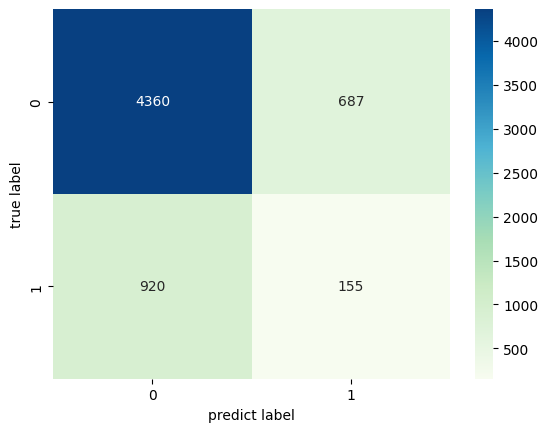

In [89]:
y_score = clf_xgb.predict(X_test)                                   
y_score_pro = clf_xgb.predict_proba(X_test) # (212, 2)
y_one_hot = to_categorical(Y_test)
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(Y_test, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(Y_test, y_score)))
print('precision:{}'.format(precision_score(Y_test, y_score)))
print('recall:{}'.format(recall_score(Y_test, y_score)))
print('f1-score:{}'.format(f1_score(Y_test, y_score)))

import seaborn as sns
sns.heatmap(obj1, fmt='d', cmap='GnBu', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.show()


AUC :  0.7841542987245832


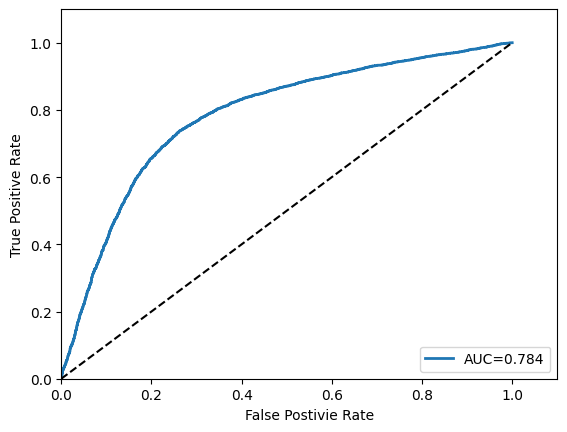

In [83]:
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)

plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

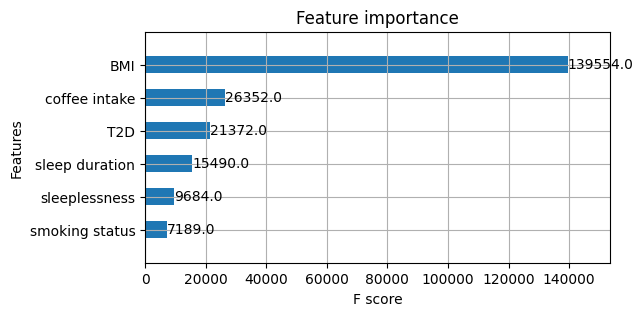

In [90]:
from xgboost import plot_importance
### plot feature importance
fig,ax = plt.subplots(figsize=(6,3))
feature_names = ['sleep duration','sleeplessness','BMI', 'smoking status','T2D','coffee intake']
clf_xgb.get_booster().feature_names = feature_names
plot_importance(clf_xgb,
                height=0.5,
                ax=ax,
                max_num_features=64)
plt.show()

In [98]:
# try lightGBM
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [2,3,4,5,6],
    'num_leaves': [15,20,25],
    'scale_pos_weight':[5]
}

gbm = lgb.LGBMClassifier()
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', cv=3)
gsearch.fit(X_train, Y_train)
gsearch.best_params_

{'max_depth': 2, 'num_leaves': 15, 'scale_pos_weight': 5}

In [101]:
clf_lgb = lgb.LGBMClassifier(max_depth=6, num_leaves=150,scale_pos_weight=5)
clf_lgb.fit(X_train,Y_train)

import pickle
with open('../models/6-feature/LGBM.pickle', 'wb') as f:
    pickle.dump(clf_lgb, f)

confusion_matrix
 [[2985 2062]
 [ 494  581]]
accuracy:0.5824893825547207
precision:0.21982595535376467
recall:0.5404651162790698
f1-score:0.3125336202259279


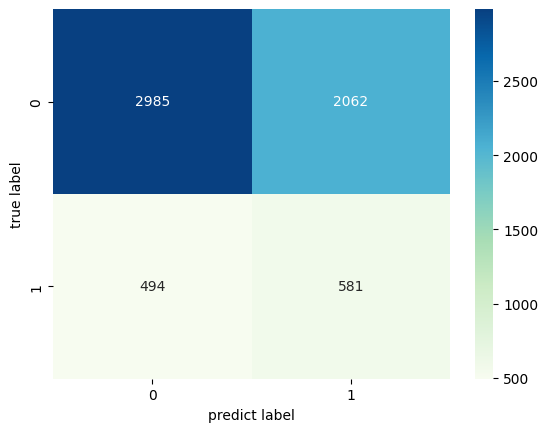

In [105]:
y_score = clf_lgb.predict(X_test)                                   
y_score_pro = clf_lgb.predict_proba(X_test) # (212, 2)
y_one_hot = to_categorical(Y_test)
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(Y_test, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(Y_test, y_score)))
print('precision:{}'.format(precision_score(Y_test, y_score)))
print('recall:{}'.format(recall_score(Y_test, y_score)))
print('f1-score:{}'.format(f1_score(Y_test, y_score)))

import seaborn as sns
sns.heatmap(obj1, fmt='d', cmap='GnBu', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.show()

(6122, 2)
(6122, 2)
AUC :  0.5908799205440589


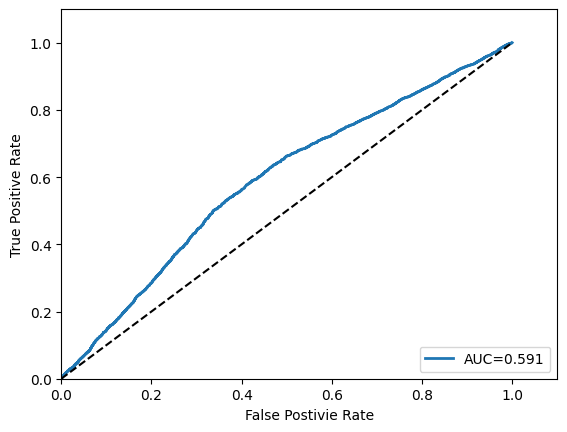

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
print(y_one_hot.shape)
print(y_score_pro.shape)
fpr_lgb, tpr_lgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_lgb = auc(fpr_lgb, tpr_lgb)
print("AUC : ", auc_lgb)

plt.plot(fpr_lgb, tpr_lgb, linewidth = 2,label='AUC=%.3f' % auc_lgb)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()